### 1. 데이타 그룹 연산 = group by

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
'''
통계자료에서 그룹 함수 가장 많이 사용한다.
그룹핑 시키는 방법 - 세분화를 위해 그룹핑함
합, 평균, 최대, 최소, 총합 기능이 다 제공된다.
사용자 정의 함수를 만들고 가져다 쓰는 방법도 소개
'''

'\n통계자료에서 그룹 함수 가장 많이 사용한다.\n그룹핑 시키는 방법\n합, 평균, 최대, 최소, 총합 기능이 다 제공된다.\n사용자 정의 함수를 만들고 가져다 쓰는 방법도 소개\n'

In [3]:
df = DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)
})

df


,Gender,Smoking,CountA,CountB
0,Female,Smoker,4,5
1,Male,Smoker,4,6
2,Female,Smoker,5,6
3,Male,Non-Smoker,1,4
4,Female,Non-Smoker,4,3
5,Male,Non-Smoker,3,4
6,Female,Non-Smoker,5,5
7,Female,Smoker,7,9


In [4]:
#1.
# groupby()로 데이터를 세분화(그룹화)하면 DataFrameGroupBY 객체가 리턴
# 이 객체만으로는 아무것도 하지 못한다.
# 1. 객체를 리턴받고 2. 통계함수를 적용
df.groupby('Gender')

In [5]:
#2. Smoking은 Numeric 컬럼이 아니라서 sum() 통계함수의 적용을 받지 못한다.
# 숫자 : sum(), mean()
# 숫자, 문자 : max(), min()
df.groupby('Gender').sum()

,CountA,CountB
Gender,,
Female,25,28
Male,8,14


In [6]:
df.groupby('Gender').max()

,Smoking,CountA,CountB
Gender,,,
Female,Smoker,7,9
Male,Smoker,4,6


In [8]:
df.groupby(['Gender', 'Smoking']).sum()

CountA  CountB
Gender Smoking                   
Female Non-Smoker       9       8
       Smoker          16      20
Male   Non-Smoker       4       8
       Smoker           4       6

In [11]:
#df.groupby('Gender')['CountA']
#특정한 컬럼에 한해서만 그룹핑.. 시리즈 반환
df.groupby('Gender')['CountA'].sum()
df.groupby('Gender')['CountA'].agg('sum') #위와 동일한 결과

Gender
Female    25
Male       8
Name: CountA, dtype: int32

In [15]:
df.groupby('Gender')[['CountA']].sum() #데이터 프레임으로 반환
df.groupby('Gender')[['CountA']].agg('sum')
df.groupby('Gender')['CountA'].agg(['sum'])

,sum
Gender,
Female,25
Male,8


#### aggregation

In [18]:
df.groupby('Gender')['CountA'].agg(['sum', 'mean', 'count'])

,sum,mean,count
Gender,,,
Female,25,5.000000,5
Male,8,2.666667,3


### 실전 데이타로 응용하기

In [20]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [21]:
#1. 날짜별로 그룹핑, count()
tipdf.groupby(['day']).count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


<AxesSubplot:xlabel='day'>

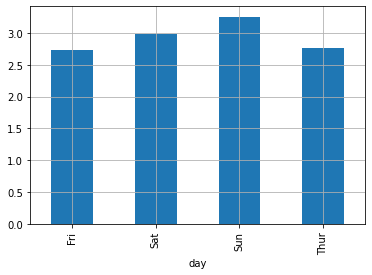

In [32]:
# 문제 1.
'''
day라는 칼럼으로 그룹핑 요일별 팁의 평균을 확인..
정렬로 마무리, 시각화
'''

# tipdf.groupby('day')[['tip']].mean()
tip_group=tipdf.groupby('day')
tip_group['tip'].mean()

#2)
tip_group['tip'].mean().sort_values(ascending=False)

#3)
tip_group['tip'].mean().plot(kind='bar', grid=True)

In [36]:
# 문제 2.
# tipdf에서 성별로 먼저 그룹핑 하고, 나중에 다시 흡연여부로 그룹핑
# tipdf.groupby(['sex','smoker']).mean()
tip_groupby2 = tipdf.groupby(by=['sex','smoker'])
tip_groupby2

AttributeError: module 'matplotlib' has no attribute 'show'

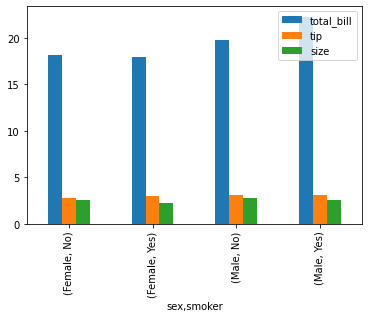

In [37]:
tip_groupby2.mean().plot(kind='bar')
plt.show()

#### 알아두면 좋은 함수, 속성들

In [40]:
#1. unique()
df['Gender'].unique()

#2. describe() - 데이타에 대한 간단한 설명(간략한 통계자료), 데이타의 성격을 알고 싶을때
df.describe()

#3. sum() - 숫자데이타에만 적용
#4. count() - 값의 갯수
#5. value_counts() - 해당 컬럼에서 그 값이 몇개 나왔는지를 알 수 있다.
df['Smoking'].value_counts()

Non-Smoker    4
Smoker        4
Name: Smoking, dtype: int64

In [42]:
#6. apply()

'''
판다스에서 내가 함수를 만들어서 적용할 때 사용
판다스에서 제공하지 않는 함수를 내가 직접 만들어서 사용할 수 있다.
'''

def add(x):
    return x+100

# df[['CountA']].apply(add) #sum() | agg(['sum', 'mean'])

df[['CountA']].agg(add)

,CountA
0,104
1,104
2,105
3,101
4,104
5,103
6,105
7,107
